In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pickle

In [22]:
data_folder = "/storage/yw18581/data/"
dataset_folder = os.path.join(data_folder, "dataset")

In [4]:
src_folder = "/storage/yw18581/src/leaf_reco/"

In [5]:
saved_models = os.path.join(src_folder, "saved_models")

In [6]:
os.listdir(os.path.join(saved_models, "trained_6positions"))

['Trained_rUNet_pytorch_6positions_dataset_5epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_10epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_15epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_20epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_25epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_30epochs_0.75coeff_mask.pkl',
 'history_Trained_rUNet_pytorch_30epochs_0.75coef.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_5epochs_0.7coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_10epochs_0.7coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_15epochs_0.7coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_20epochs_0.7coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_25epochs_0.7coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_30epochs_0.7coeff_mask.pkl',
 'history_Trained_rUNet_pytorch_30epochs_0.7coef.pkl',
 'Trained_rUNet_pytor

In [7]:
file = open(os.path.join(saved_models, 
                                   "trained_6positions",
                                   "history_Trained_rUNet_pytorch_30epochs_0.7coef.pkl"),'rb')
history = pickle.load(file)

In [8]:
history

{'train': [46.49763241520635,
  42.267683064496076,
  14.848708301023752,
  -0.5868206754050873,
  -0.6313052436819783,
  -0.6464647741781341,
  -0.5958290625777509,
  -0.64476170749576,
  -0.645672352777587,
  -0.6460486454544244,
  -0.6477504471937815,
  -0.6529093936637596,
  -0.6468570193758717,
  -0.6532307198202169,
  -0.6542135372206017,
  -0.6586453086800046,
  -0.6565647161117306,
  -0.658144299906713,
  -0.6602084026844414,
  -0.6387956752269356,
  -0.6603403138341727,
  -0.6610945777760612,
  -0.6594284510722866,
  -0.6551810067009043,
  -0.660640614176238,
  -0.6412220943581175,
  -0.6602733952027781,
  -0.6650665441045055,
  -0.6610838014770437,
  -0.6633563295558647],
 'val': [41.184076379846644,
  42.55977722450539,
  -0.5081799019266058,
  -0.5951115113717539,
  -0.648827498709714,
  -0.6226313710212708,
  -0.629451522120723,
  -0.6544459307635272,
  -0.6531281018698657,
  -0.6488880459909085,
  -0.6587589581807455,
  -0.6590307785405053,
  -0.6618037190702226,
  -0.659

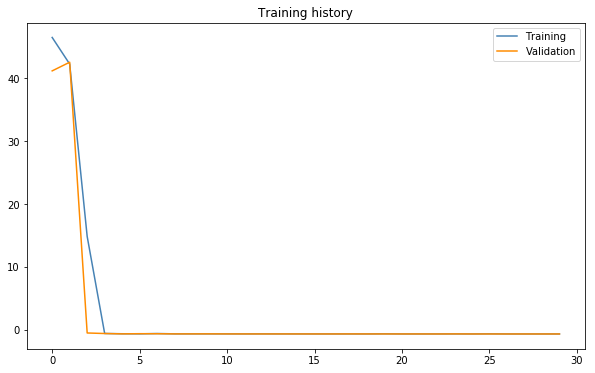

In [11]:
plt.figure(figsize=(10,6))
plt.title("Training history")
plt.plot(history['epochs'], history['train'], c='steelblue', label='Training', )
plt.plot(history['epochs'], history['val'], c='darkorange', label='Validation')
plt.ylim=(0,50)
plt.ylim = (0,30)
plt.legend(loc='upper right')

In [13]:
import sys
sys.path.append('../')
from sklearn.metrics import mean_squared_error

In [14]:
distances =[2,4,10,20,25,35]


In [15]:
from setenv import add_folders

In [16]:
add_folders(key="deepthought")

In [17]:
from utility_functions import define_dataset, training_phase_rUNet, inference_phase_rUNet, exclude_dist, inference_phase_rUNet_plot_notebook

In [18]:
from cUNet_pytorch_pooling import cUNet

In [19]:
import torch

In [23]:
excluded = exclude_dist(dist_list=distances, root_folder=dataset_folder)

In [24]:
excluded

['10x10_2mm_second_clean',
 '10x10_2mm_third_clean',
 '10x10_2mm_first_clean',
 '10x10_2mm_first',
 '10x10_2mm_second',
 '10x10_2mm_third',
 '10x10_4mm_second_clean',
 '10x10_4mm_third_clean',
 '10x10_4mm_first_clean',
 '10x10_4mm_first',
 '10x10_4mm_second',
 '10x10_4mm_third',
 '10x10_10mm_second_clean',
 '10x10_10mm_third_clean',
 '10x10_10mm_first_clean',
 '10x10_10mm_first',
 '10x10_10mm_second',
 '10x10_10mm_third',
 '10x10_20mm_second_clean',
 '10x10_20mm_third_clean',
 '10x10_20mm_first_clean',
 '10x10_20mm_first',
 '10x10_20mm_second',
 '10x10_20mm_third',
 '10x10_25mm_second_clean',
 '10x10_25mm_third_clean',
 '10x10_25mm_first_clean',
 '10x10_25mm_first',
 '10x10_25mm_second',
 '10x10_25mm_third',
 '10x10_35mm_second_clean',
 '10x10_35mm_third_clean',
 '10x10_35mm_first_clean',
 '10x10_35mm_first',
 '10x10_35mm_second',
 '10x10_35mm_third']

In [25]:
data_loaders, data_lengths= define_dataset(dataset_folder, batch_size=16, excluded_list=excluded, alldata=True)

In [26]:
data_lengths

3532

In [27]:
fname = 'Trained_rUNet_pytorch_6positions_dataset_30epochs_0.7coeff_mask.pkl'

In [29]:
model= cUNet(out_size=1)
model_pred = torch.load(os.path.join(saved_models, "trained_6positions",fname))['model_state_dict'];
model.load_state_dict(model_pred)
y_true, y_pred = inference_phase_rUNet(model, data_loaders, data_lengths, batch_size=16,
                                               notebook=True, test=False)

In [30]:
y_true

array([15, 15, 15, ...,  3,  3,  3])

In [31]:
y_pred

array([14.972178 , 15.12045  , 15.001039 , ...,  2.847253 ,  3.076104 ,
        3.0780458], dtype=float32)

In [32]:
np.savez_compressed("predictions_30epochs_6positions_training_test_on_4_070.npz",
                   true=y_true, pred=y_pred)

In [33]:
mean_squared_error(y_true, y_pred)

0.07183433940545213

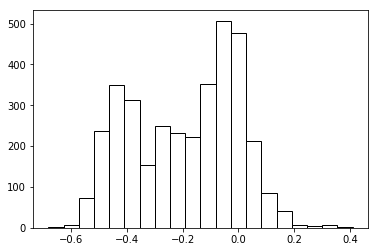

In [42]:
plt.hist(y_true-y_pred, bins=20, edgecolor='k',color='white')
plt.xlim=(-1,1)
plt.show()

In [43]:
def idx_mse(dist, true_arr = y_true, preds_arr = y_pred):
    idx = np.where(true_arr==dist)[0]
    mse = mean_squared_error(true_arr[idx], preds_arr[idx])
    print(dist, mse)
    return idx, mse 

In [44]:
dists = [1, 3, 15, 30]

In [46]:
errors = [idx_mse(i)[1] for i in dists]

1 0.1957058861561568
3 0.013541681794265036
15 0.004110707832196568
30 0.06957474770856707


In [47]:
idxs = [idx_mse(i)[0] for i in dists]

1 0.1957058861561568
3 0.013541681794265036
15 0.004110707832196568
30 0.06957474770856707


In [48]:
y_1mm_true = y_true[idxs[0]]
y_1mm_pred = y_pred[idxs[0]]

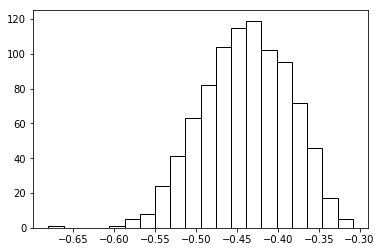

In [49]:
plt.hist(y_1mm_true-y_1mm_pred, bins=20, edgecolor='k',color='white')
plt.xlim=(-1,1)
plt.show()

In [52]:
y_3mm_true = y_true[idxs[1]]
y_3mm_pred = y_pred[idxs[1]]

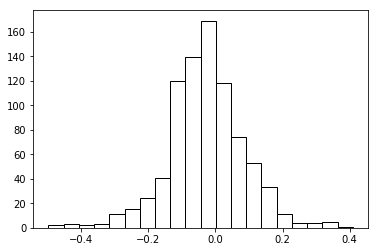

In [53]:
plt.hist(y_3mm_true-y_3mm_pred, bins=20, edgecolor='k',color='white')
plt.xlim=(-1,1)
plt.show()

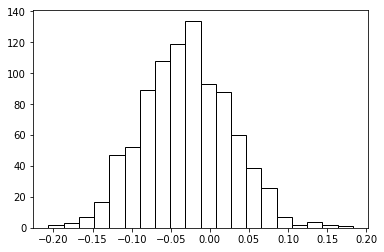

In [54]:
y_15mm_true = y_true[idxs[2]]
y_15mm_pred = y_pred[idxs[2]]

plt.hist(y_15mm_true-y_15mm_pred, bins=20, edgecolor='k',color='white')
plt.xlim=(-1,1)
plt.show()


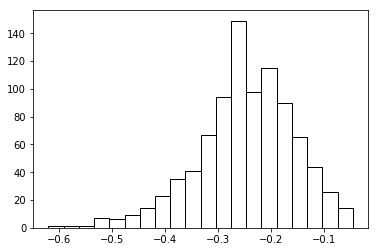

In [55]:
y_30mm_true = y_true[idxs[3]]
y_30mm_pred = y_pred[idxs[3]]

plt.hist(y_30mm_true-y_30mm_pred, bins=20, edgecolor='k',color='white')
plt.xlim=(-1,1)
plt.show()

In [56]:
np.std(y_true-y_pred)

0.1898685414970935

In [58]:
np.std(y_1mm_true-y_1mm_pred)

0.053173726438600494

In [59]:
np.std(y_3mm_true-y_3mm_pred)

0.11310954967293244

In [60]:
np.std(y_15mm_true-y_15mm_pred)

0.05657765656015848

In [57]:
np.std(y_30mm_true-y_30mm_pred)

0.09051123932033583